<a href="https://colab.research.google.com/github/u-t-k-a-n/Detection-of-Similar-Points-in-Traffic-Characteristics/blob/main/DataVisualization_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import os
import pandas as pd
import calendar
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "drive/MyDrive/2017_v1"
files = list()

In [4]:
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))

In [170]:
def show_plotline_5minutes(filename,month,day):
  """ month: int 1 -> January
                 12 -> December
      day: int 0 -> Monday
               6 -> Sunday
  """
  df = pd.read_csv(filename)
  size = (24 * 60) // 5
  plt.figure(figsize=(24,20))
  graphic = pd.DataFrame(columns=["i","day","month","year"])
  index = 1

  for i in range(0,len(df),size):
    date = df.iloc[i]["time"]
    year = int(date[:4])
    month_ = int(date[5:7])
    day_ = int(date[8:10])
    

    if month == month_ and day == calendar.weekday(year,month_,day_):
      index += 1
      graphic.loc[date] = [i,day_,month_,year]
      

  for j in range(1,index):
    plt.subplot(3,2,j,title="Traffic Flow Speed in 5 Minutes",
                  xlabel="{}/{}/{}".format(graphic.iloc[j-1]["day"],graphic.iloc[j-1]["month"],graphic.iloc[j-1]["year"]),
                  ylabel="Speed (km/h)")
    plt.plot(df[graphic.iloc[j-1]["i"]:graphic.iloc[j-1]["i"]+size]["time"],
               df[graphic.iloc[j-1]["i"]:graphic.iloc[j-1]["i"]+size]["speed"])


  

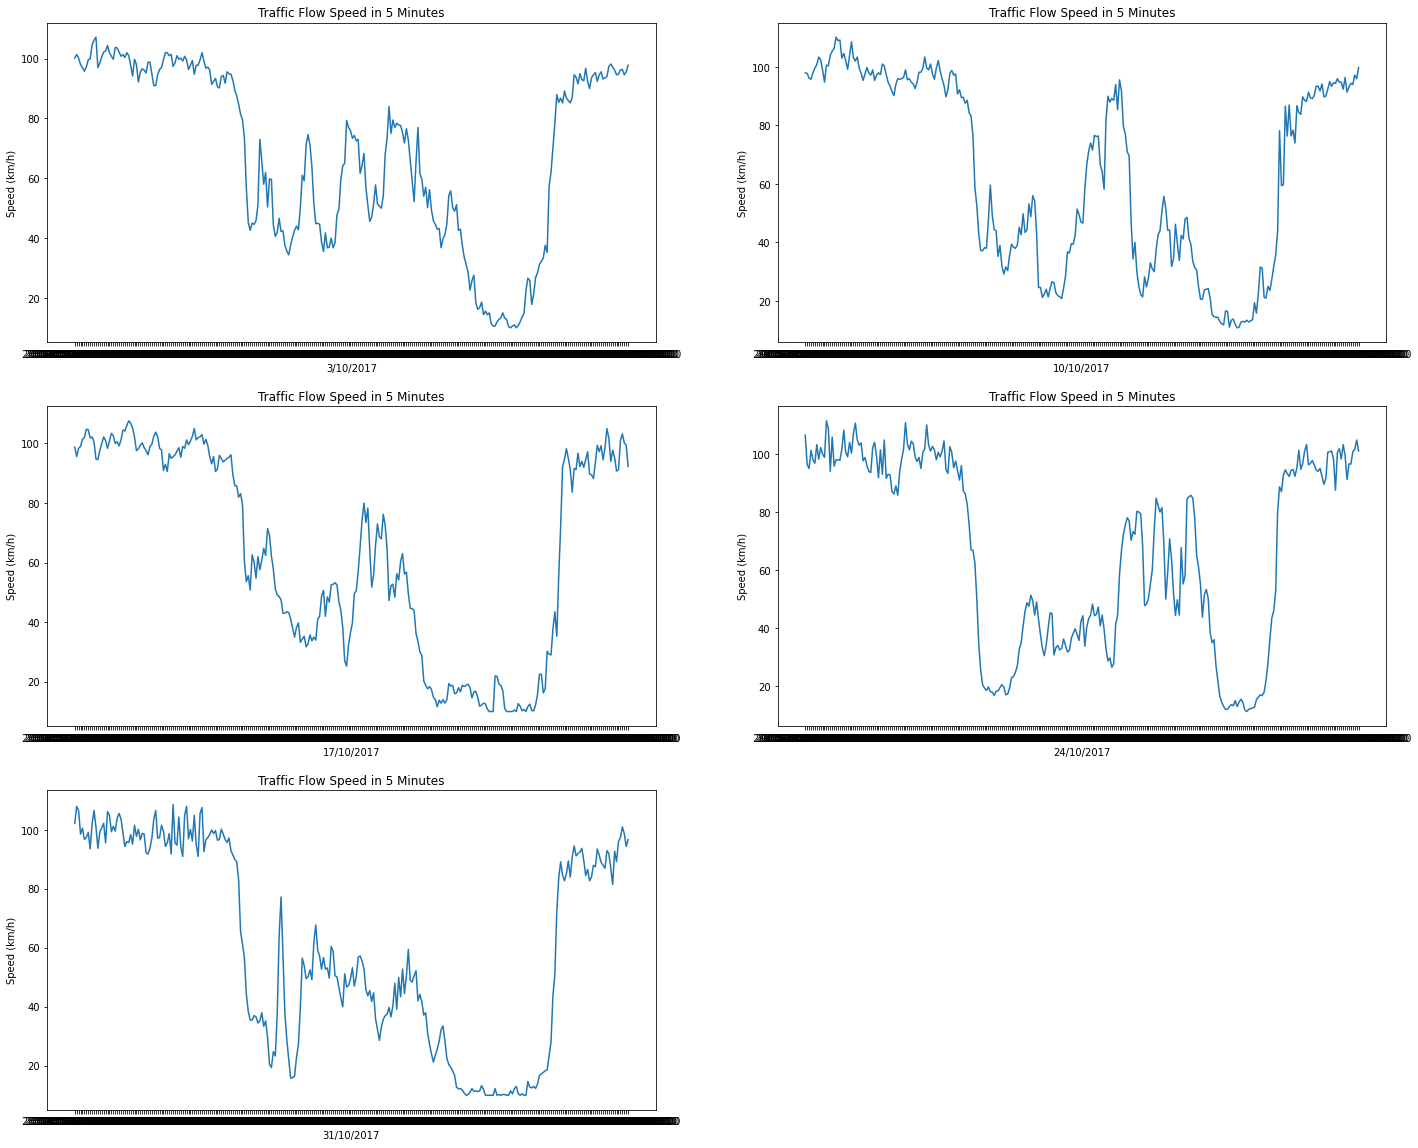

In [171]:
show_plotline_5minutes(files[0],10,1)